In [19]:
#importing All Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import joblib
%matplotlib inline
sns.set_style('whitegrid')

In [20]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,61,1,148,203,0,1,161,0,0,2.0,1,3,0,NaN
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.0


In [21]:
df.shape

(1024, 14)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 14 columns):
age         1024 non-null int64
sex         1024 non-null int64
cp          1024 non-null int64
trestbps    1024 non-null int64
chol        1024 non-null int64
fbs         1024 non-null int64
restecg     1024 non-null int64
thalach     1024 non-null int64
exang       1024 non-null int64
oldpeak     1024 non-null float64
slope       1024 non-null int64
ca          1024 non-null int64
thal        1024 non-null int64
target      1023 non-null float64
dtypes: float64(2), int64(12)
memory usage: 112.1 KB


In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1023.000000
mean,54.458984,0.695312,1.085938,131.681641,245.862305,0.150391,0.685547,148.926758,0.336914,1.073535,1.383789,0.751953,2.321289,0.513196
std,9.064140,0.460500,4.709388,17.664358,52.129337,0.357629,5.042415,23.464320,0.472886,1.175505,0.617575,1.027955,0.624755,0.500070
min,29.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,148.000000,203.000000,564.000000,1.000000,161.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      1
dtype: int64

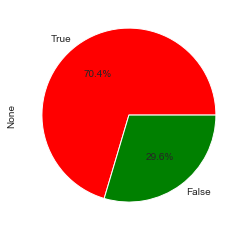

In [25]:
df.duplicated().value_counts().plot(kind='pie', autopct='%1.1f%%',colors=['red','green'])
plt.show()

In [26]:
df.duplicated().sum()

721

In [27]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [28]:
df.nunique()

age          41
sex           2
cp            5
trestbps     50
chol        153
fbs           2
restecg       4
thalach      92
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [29]:
df.shape

(303, 14)

In [30]:
df.target.unique()

array([nan,  0.,  1.])

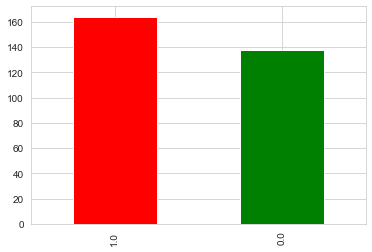

In [31]:
df.target.value_counts().plot(kind='bar', color=['red','green'])
plt.show()

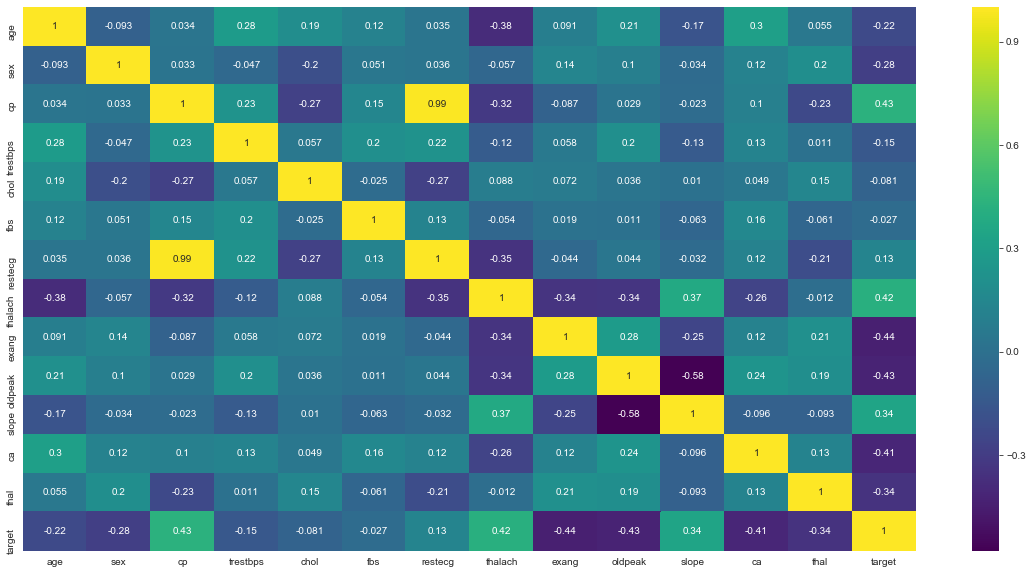

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [33]:
X=df.drop(columns='target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,61,1,148,203,0,1,161,0,0,2.0,1,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [34]:
y=df.iloc[:,-1:]
y.head()

,target
0,NaN
1,0.0
2,0.0
3,0.0
4,0.0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X_train having ",X_train.shape[0],' number od rows and ',X_train.shape[1],' number of columns.')
display(X_train.head())
print("X_test having ",X_test.shape[0],' number od rows and ',X_test.shape[1],' number of columns.')
display(X_test.head())
print("y_train having ",y_train.shape[0],' number od rows and ',y_train.shape[1],' number of columns.')
display(y_train.head())
print("y_test having ",y_test.shape[0],' number od rows and ',y_test.shape[1],' number of columns.')
display(y_test.head())

X_train having  212  number od rows and  13  number of columns.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
169,43,1,0,150,247,0,1,171,0,1.5,2,0,2
124,60,0,3,150,240,0,1,171,0,0.9,2,0,2
605,66,1,0,112,212,0,0,132,1,0.1,2,1,2
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3
171,56,1,1,120,240,0,1,169,0,0.0,0,0,2


X_test having  91  number od rows and  13  number of columns.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
341,65,0,2,155,269,0,1,148,0,0.8,2,0,2
190,56,1,1,130,221,0,0,163,0,0.0,2,0,3
348,62,0,2,130,263,0,1,97,0,1.2,1,1,3
287,58,0,2,120,340,0,1,172,0,0.0,2,0,2
56,48,1,1,130,245,0,0,180,0,0.2,1,0,2


y_train having  212  number od rows and  1  number of columns.


,target
169,1.0
124,1.0
605,0.0
47,0.0
171,1.0


y_test having  91  number od rows and  1  number of columns.


,target
341,1.0
190,1.0
348,0.0
287,1.0
56,1.0


In [36]:
L_model=LogisticRegression()
L_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_pred_train=L_model.predict(X_train)
y_pred_train

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [ ]:
y_pred_test=L_model.predict(X_test)
y_pred_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1], dtype=int64)

In [ ]:
train_accuracy=accuracy_score(y_train, y_pred_train)
test_accuracy=accuracy_score(y_test, y_pred_test)
print("Train Accuarcy: ",train_accuracy)
print("Test Accuarcy: ",test_accuracy)

Train Accuarcy:  0.8767772511848341
Test Accuarcy:  0.8021978021978022


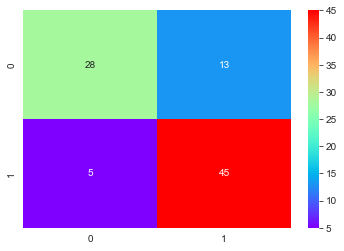

In [ ]:
cm=confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='rainbow')
plt.show()

In [ ]:
cr=classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        41
           1       0.78      0.90      0.83        50

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91



In [ ]:
result=pd.DataFrame(data=[['Logistic Regresssion', train_accuracy, test_accuracy]], columns=['Model','training Accuracy %','Testing Accuracy %'])
result

,Model,training Accuracy %,Testing Accuracy %
0,Logistic Regresssion,0.876777,0.802198


In [ ]:
s_model=SVC()
s_model.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [ ]:
y_pred_train=L_model.predict(X_train)
y_pred_train

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [ ]:
y_pred_test=L_model.predict(X_test)
y_pred_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1], dtype=int64)

In [ ]:
train_accuracy=accuracy_score(y_train, y_pred_train)
test_accuracy=accuracy_score(y_test, y_pred_test)
print("Train Accuarcy: ",train_accuracy)
print("Test Accuarcy: ",test_accuracy)

Train Accuarcy:  0.8767772511848341
Test Accuarcy:  0.8021978021978022


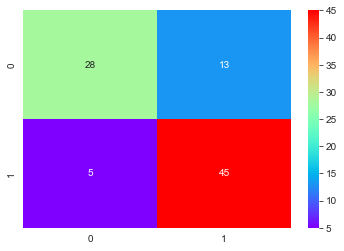

In [ ]:
cm=confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='rainbow')
plt.show()

In [ ]:
cr=classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        41
           1       0.78      0.90      0.83        50

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91



In [ ]:
temp_df=pd.DataFrame(data=[['Support Vector Machine', train_accuracy, test_accuracy]], columns=['Model','training Accuracy %','Testing Accuracy %'])
result=result.append(temp_df, ignore_index=True)
result

,Model,training Accuracy %,Testing Accuracy %
0,Logistic Regresssion,0.876777,0.802198
1,Support Vector Machine,0.876777,0.802198


In [ ]:
DT_model=DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_train=L_model.predict(X_train)
y_pred_train

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [ ]:
y_pred_test=L_model.predict(X_test)
y_pred_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1], dtype=int64)

In [ ]:
train_accuracy=accuracy_score(y_train, y_pred_train)
test_accuracy=accuracy_score(y_test, y_pred_test)
print("Train Accuarcy: ",train_accuracy)
print("Test Accuarcy: ",test_accuracy)

Train Accuarcy:  0.8767772511848341
Test Accuarcy:  0.8021978021978022


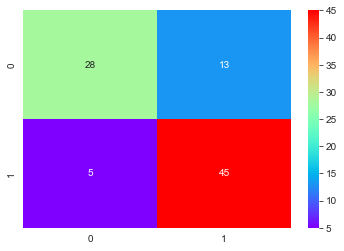

In [ ]:
cm=confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='rainbow')
plt.show()

In [ ]:
cr=classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        41
           1       0.78      0.90      0.83        50

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91



In [ ]:
temp_df=pd.DataFrame(data=[['Decision Tree', train_accuracy, test_accuracy]], columns=['Model','training Accuracy %','Testing Accuracy %'])
result=result.append(temp_df, ignore_index=True)
result

,Model,training Accuracy %,Testing Accuracy %
0,Logistic Regresssion,0.876777,0.802198
1,Support Vector Machine,0.876777,0.802198
2,Decision Tree,0.876777,0.802198


In [ ]:
RF_model=RandomForestClassifier(n_estimators=1000)
RF_model.fit(X_train, y_train)

C:\Users\DELL\AppData\Local\Temp/ipykernel_9368/4282905731.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000)

In [ ]:
y_pred_train=L_model.predict(X_train)
y_pred_train

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [ ]:
y_pred_test=L_model.predict(X_test)
y_pred_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1], dtype=int64)

In [ ]:
train_accuracy=accuracy_score(y_train, y_pred_train)
test_accuracy=accuracy_score(y_test, y_pred_test)
print("Train Accuarcy: ",train_accuracy)
print("Test Accuarcy: ",test_accuracy)

Train Accuarcy:  0.8767772511848341
Test Accuarcy:  0.8021978021978022


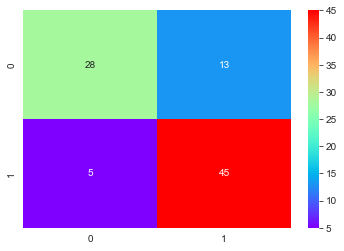

In [ ]:
cm=confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='rainbow')
plt.show()

In [ ]:
cr=classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        41
           1       0.78      0.90      0.83        50

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91



In [ ]:
temp_df=pd.DataFrame(data=[['Random Forest', train_accuracy, test_accuracy]], columns=['Model','training Accuracy %','Testing Accuracy %'])
result=result.append(temp_df, ignore_index=True)
result

,Model,training Accuracy %,Testing Accuracy %
0,Logistic Regresssion,0.876777,0.802198
1,Support Vector Machine,0.876777,0.802198
2,Decision Tree,0.876777,0.802198
3,Random Forest,0.876777,0.802198


In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_model.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_pred_train=L_model.predict(X_train)
y_pred_train

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [ ]:
y_pred_test=L_model.predict(X_test)
y_pred_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1], dtype=int64)

In [ ]:
train_accuracy=accuracy_score(y_train, y_pred_train)
test_accuracy=accuracy_score(y_test, y_pred_test)
print("Train Accuarcy: ",train_accuracy)
print("Test Accuarcy: ",test_accuracy)

Train Accuarcy:  0.8767772511848341
Test Accuarcy:  0.8021978021978022


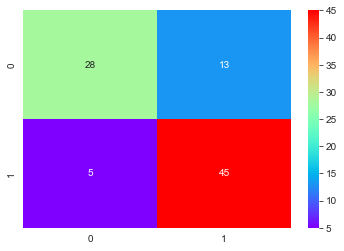

In [ ]:
cm=confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='rainbow')
plt.show()

In [ ]:
cr=classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        41
           1       0.78      0.90      0.83        50

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91



In [ ]:
temp_df=pd.DataFrame(data=[['K-Nearest Neighbors', train_accuracy, test_accuracy]], columns=['Model','training Accuracy %','Testing Accuracy %'])
result=result.append(temp_df, ignore_index=True)
result

,Model,training Accuracy %,Testing Accuracy %
0,Logistic Regresssion,0.876777,0.802198
1,Support Vector Machine,0.876777,0.802198
2,Decision Tree,0.876777,0.802198
3,Random Forest,0.876777,0.802198
4,K-Nearest Neighbors,0.876777,0.802198


In [ ]:
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [ ]:
y_pred_train=L_model.predict(X_train)
y_pred_train

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [ ]:
y_pred_test=L_model.predict(X_test)
y_pred_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1], dtype=int64)

In [ ]:
train_accuracy=accuracy_score(y_train, y_pred_train)
test_accuracy=accuracy_score(y_test, y_pred_test)
print("Train Accuarcy: ",train_accuracy)
print("Test Accuarcy: ",test_accuracy)

Train Accuarcy:  0.8767772511848341
Test Accuarcy:  0.8021978021978022


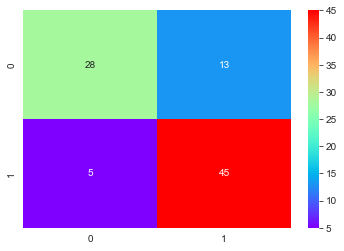

In [ ]:
cm=confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='rainbow')
plt.show()

In [ ]:
cr=classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        41
           1       0.78      0.90      0.83        50

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91



In [ ]:
temp_df=pd.DataFrame(data=[['naive Bayes', train_accuracy, test_accuracy]], columns=['Model','training Accuracy %','Testing Accuracy %'])
result=result.append(temp_df, ignore_index=True)
result

,Model,training Accuracy %,Testing Accuracy %
0,Logistic Regresssion,0.876777,0.802198
1,Support Vector Machine,0.876777,0.802198
2,Decision Tree,0.876777,0.802198
3,Random Forest,0.876777,0.802198
4,K-Nearest Neighbors,0.876777,0.802198
5,naive Bayes,0.876777,0.802198
